# Project: Wrangling and Analyze Data

In [113]:
#Import all the packages
import pandas as pd
import numpy as np
import os
import requests
import json
import random
import matplotlib.pyplot as plt

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [21]:
# Read the 'twitter-archive-inhanced.csv' into pandas dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [23]:
# Download 'image-prediction.tsv' using request library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image_predictions.tsv','wb') as file:
    image_predictions = requests.get(url)
    file.write(image_predictions.content)

In [24]:
# Read the downloaded 'image-prediction.tsv' file intpo pandas dataframe
image_pred_df = pd.read_csv('image_predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [25]:
# Read the downloaded tweet_json.txt file line by line into pandas dataframe
with open('tweet-json.txt') as file:
    tw_api_df = pd.DataFrame((json.loads(line) for line in file), columns = ['created_at','id','retweeted','favourites_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter Archive

In [26]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [29]:
np.isfinite(twitter_archive_df.retweeted_status_id).sum()

181

### Image predictions

In [30]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_pred_df.jpg_url.duplicated().sum()

66

In [33]:
image_pred_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [34]:
image_pred_df.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [35]:
image_pred_df.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

### Twitter API

In [36]:
tw_api_df.head()

,created_at,id,retweeted,favourites_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,False,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,False,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,False,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,False,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,False,NaN


In [37]:
tw_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   created_at        2354 non-null   object 
 1   id                2354 non-null   int64  
 2   retweeted         2354 non-null   bool   
 3   favourites_count  0 non-null      float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 57.6+ KB


### Quality issues
1. Column names are not descriptive and are confusing to interpret.

2. There are 66 duplicate images.

3. Data type of timestamp is incorrect.

4. For some entries rating denominator is not equal to 10.

5. For some entries rating numerator is less than rating denominator.

6. There are 181 retweet entries which needs to be removed.

7. Some of the predicted items contain underscore between words.

8. Tweet id should be string.

### Tidiness issues
1. A single column for kind of dog instead of four different columns

2. A seperate column for the rating (numerator rating / denominator rating) for comparision

3. Twitter API dataframe and Twitter Archive dataframe should be in same dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
clean_twitter_archive_df = twitter_archive_df.copy()
clean_image_pred_df = image_pred_df.copy()
clean_tw_api_df = tw_api_df.copy()

### Issue #1: Column names are not descriptive and are confusing to interpret

#### Define: 
Replace current column names of the three dataframes using .rename() method.

#### Code

In [40]:
clean_tw_api_df.rename(columns = {'id':'tweet_id',
                                 'created_at':'tweet_date',
                                 'favourites_counts':'like_counts'}, inplace = True)

clean_image_pred_df.rename(columns = {'jpg_url':'image_url',
                                     'img_num':'number_of_images',
                                     'p1':'prediction_1',
                                     'p2':'prediction_2',
                                     'p3':'prediction_3',
                                     'p1_dog':'prediction_1_if_dog',
                                     'p2_dog':'prediction_2_if_dog',
                                     'p3_dog':'prediction_3_if_dog',}, inplace = True)

clean_twitter_archive_df.rename(columns = {'favourites_count':'like_count',
                                           'favourites_count':'like_count'}, inplace = True)

#### Test

In [41]:
clean_tw_api_df.head(1)

,tweet_date,tweet_id,retweeted,favourites_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,False,NaN


In [42]:
clean_image_pred_df.head(1)

,tweet_id,image_url,number_of_images,prediction_1,p1_conf,prediction_1_if_dog,prediction_2,p2_conf,prediction_2_if_dog,prediction_3,p3_conf,prediction_3_if_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [43]:
clean_twitter_archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #2: Twitter API dataframe and Twitter Archive dataframe should be in same dataframe.

#### Define
Combine clean_tw_api_df and clean_twitter_archive_df using .merge() method

#### Code

In [44]:
clean_twitter_archive_df = pd.merge(clean_tw_api_df, clean_twitter_archive_df, on='tweet_id')

#### Test

In [45]:
clean_twitter_archive_df.head()

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,False,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,False,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,False,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,False,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,False,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3: A single column for kind of dog instead of four different columns

#### Define

Create a seperate column for kind of dog and remove the useless columns with this respect.

#### Code

In [46]:
# Create a list of dog 'kind' based on values in respetive columns
stages_list = []

for i in range(clean_twitter_archive_df.shape[0]):
    x = 0
    if clean_twitter_archive_df.doggo[i] != 'None':
        x += 1
    if clean_twitter_archive_df.floofer[i] != 'None':
        x += 1
    if clean_twitter_archive_df.pupper[i] != 'None':
        x += 1
    if clean_twitter_archive_df.puppo[i] != 'None':
        x += 1
    if x == 0:
        stages_list.append('not_availabe')
    if x > 1:
        stages_list.append('multiple_entries')
    if x == 1:
        if clean_twitter_archive_df.doggo[i] == 'doggo': 
            stages_list.append('doggo')
        if clean_twitter_archive_df.floofer[i] == 'floofer':
            stages_list.append('floofer')
        if clean_twitter_archive_df.pupper[i] == 'pupper':
            stages_list.append('pupper')
        if clean_twitter_archive_df.puppo[i] == 'puppo':
            stages_list.append('puppo')

In [47]:
# Convert list into numpy array
stages_list = np.array(stages_list)

In [48]:
# Add the this array to Twitter Archive dataframe
clean_twitter_archive_df['stage'] = stages_list

In [49]:
# Remove useless columns for dog 'kind'
clean_twitter_archive_df = clean_twitter_archive_df.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [50]:
clean_twitter_archive_df.sample(5)

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1276,Sun Mar 13 03:13:29 +0000 2016,708853462201716736,False,NaN,NaN,NaN,2016-03-13 03:13:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lucy. She doesn't understand fetch. 8/...,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,not_availabe
1677,Wed Dec 30 02:54:35 +0000 2015,682032003584274432,False,NaN,NaN,NaN,2015-12-30 02:54:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ulysses. He likes holding hands and hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682032003...,11,10,Ulysses,not_availabe
690,Sat Oct 15 16:01:13 +0000 2016,787322443945877504,False,NaN,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,not_availabe
243,Sun Mar 26 16:55:29 +0000 2017,846042936437604353,False,NaN,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,not_availabe
379,Fri Feb 03 19:31:54 +0000 2017,827600520311402496,False,NaN,NaN,NaN,2017-02-03 19:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827600520...,13,10,Tucker,not_availabe


In [51]:
clean_twitter_archive_df.sample()

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2037,Tue Dec 01 04:33:59 +0000 2015,671547767500775424,False,NaN,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,not_availabe


### Issue #4: For some entries rating denominator is not equal to 10.

#### Define

Query clean_twitter_archive_df where rating_denominator is equal to 10

#### Code

In [52]:
clean_twitter_archive_df = clean_twitter_archive_df.query('rating_denominator == 10')

#### Test

In [53]:
clean_twitter_archive_df.query('rating_denominator != 10')

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


### Issue #5: For some entries rating numerator is less than rating denominator.

#### Define

Query clean_twitter_archive_df where rating_numerator is greater than or equal to rating_denominator and assign it to the dataframe.

#### Code

In [54]:
clean_twitter_archive_df = clean_twitter_archive_df.query('rating_numerator >= rating_denominator')

#### Test

In [55]:
clean_twitter_archive_df.head()

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,False,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,not_availabe
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,False,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,not_availabe
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,False,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,not_availabe
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,False,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,not_availabe
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,False,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,not_availabe


### Issue #6: A seperate column for the rating (numerator rating / denominator rating) for comparision

#### Define

Create a new column which contains rate_numerator values divided by rate_denominator values for each entry.

#### Code

In [56]:
clean_twitter_archive_df['rating'] = clean_twitter_archive_df['rating_numerator']/clean_twitter_archive_df['rating_denominator']

#### Test

In [57]:
clean_twitter_archive_df.head()

,tweet_date,tweet_id,retweeted,favourites_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,False,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,not_availabe,1.3
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,False,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,not_availabe,1.3
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,False,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,not_availabe,1.2
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,False,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,not_availabe,1.3
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,False,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,not_availabe,1.2


### Issue #7: There are 66 duplicate images.

#### Define

Remove the duplicate images using .drop_duplicates() method.

#### Code

In [58]:
clean_image_pred_df = clean_image_pred_df.drop_duplicates(subset='image_url')

#### Test

In [59]:
clean_image_pred_df.image_url.duplicated().sum()

0

### Issue #8: Dataype of timestamp is incorrect

#### Define

Use .to_datetime() method of pandas to convert dtype of timestamp from string format

#### Code

In [60]:
clean_twitter_archive_df['timestamp'] = pd.to_datetime(clean_twitter_archive_df['timestamp'])

#### Test

In [61]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897 entries, 0 to 2348
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_date                  1897 non-null   object             
 1   tweet_id                    1897 non-null   int64              
 2   retweeted                   1897 non-null   bool               
 3   favourites_count            0 non-null      float64            
 4   in_reply_to_status_id       62 non-null     float64            
 5   in_reply_to_user_id         62 non-null     float64            
 6   timestamp                   1897 non-null   datetime64[ns, UTC]
 7   source                      1897 non-null   object             
 8   text                        1897 non-null   object             
 9   retweeted_status_id         170 non-null    float64            
 10  retweeted_status_user_id    170 non-null    float64         

### Issue #9:

#### Define

Query clean_twitter_archive_df dataframe where retweeted_status_id is null.

#### Code

In [62]:
clean_twitter_archive_df = clean_twitter_archive_df[clean_twitter_archive_df['retweeted_status_id'].isnull()]

#### Test

In [63]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2348
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_date                  1727 non-null   object             
 1   tweet_id                    1727 non-null   int64              
 2   retweeted                   1727 non-null   bool               
 3   favourites_count            0 non-null      float64            
 4   in_reply_to_status_id       62 non-null     float64            
 5   in_reply_to_user_id         62 non-null     float64            
 6   timestamp                   1727 non-null   datetime64[ns, UTC]
 7   source                      1727 non-null   object             
 8   text                        1727 non-null   object             
 9   retweeted_status_id         0 non-null      float64            
 10  retweeted_status_user_id    0 non-null      float64         

In [64]:
clean_twitter_archive_df.retweeted_status_id.unique()

array([nan])

### Issue 10#: Some of the predicted items contain underscore between words.

#### Define

In the respective columns, use .replace to replace underscore with blank space

#### Code

In [65]:
clean_image_pred_df['prediction_1'] = clean_image_pred_df['prediction_1'].str.replace('_',' ')
clean_image_pred_df['prediction_2'] = clean_image_pred_df['prediction_2'].str.replace('_',' ')
clean_image_pred_df['prediction_3'] = clean_image_pred_df['prediction_3'].str.replace('_',' ')

#### Test

In [66]:
clean_image_pred_df.prediction_1.unique()

array(['Welsh springer spaniel', 'redbone', 'German shepherd',
       'Rhodesian ridgeback', 'miniature pinscher',
       'Bernese mountain dog', 'box turtle', 'chow', 'shopping cart',
       'miniature poodle', 'golden retriever', 'Gordon setter',
       'Walker hound', 'pug', 'bloodhound', 'Lhasa', 'English setter',
       'hen', 'desktop computer', 'Italian greyhound', 'Maltese dog',
       'three-toed sloth', 'ox', 'malamute', 'guinea pig',
       'soft-coated wheaten terrier', 'Chihuahua',
       'black-and-tan coonhound', 'coho', 'toy terrier',
       'Blenheim spaniel', 'Pembroke', 'llama',
       'Chesapeake Bay retriever', 'curly-coated retriever', 'dalmatian',
       'Ibizan hound', 'Border collie', 'Labrador retriever', 'seat belt',
       'snail', 'miniature schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw puzzle', 'West Highland white terrier',
       'toy poodle', 'giant schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian husky', 't

In [67]:
clean_image_pred_df.prediction_2.unique()

array(['collie', 'miniature pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English springer', 'mud turtle', 'Tibetan mastiff',
       'shopping basket', 'komondor', 'Yorkshire terrier',
       'English foxhound', 'bull mastiff', 'German shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy terrier', 'toy poodle',
       'otter', 'Chesapeake Bay retriever', 'Siberian husky', 'skunk',
       'Afghan hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker spaniel', 'chow', 'Irish terrier', 'chain saw', 'beagle',
       'giant schnauzer', 'Labrador retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany spaniel', 'standard schnauzer',
       'teddy', 'armadillo', 'African hunting dog', 'vizsla', 'doormat',
       'pug', 'Italian greyhound', 'Samoyed', 'Pomeranian',
       'miniature poodle', 'Lakeland terrier', 'Irish setter', 'swab',
       'malamute', 'bath towel', 'Border collie', 'Leonberg', 'drake',
       'French bulldog', 'ice bear', 

In [68]:
clean_image_pred_df.prediction_3.unique()

array(['Shetland sheepdog', 'Rhodesian ridgeback', 'bloodhound',
       'miniature pinscher', 'Doberman', 'Greater Swiss Mountain dog',
       'terrapin', 'fur coat', 'golden retriever',
       'soft-coated wheaten terrier', 'Labrador retriever', 'Pekinese',
       'Ibizan hound', 'French bulldog', 'malinois', 'Dandie Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature poodle',
       'great grey owl', 'groenendael', 'Eskimo dog', 'hamster', 'briard',
       'papillon', 'flat-coated retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power drill', 'Saluki',
       'Great Pyrenees', 'West Highland white terrier', 'collie',
       'toy poodle', 'vizsla', 'acorn', 'giant schnauzer', 'teddy',
       'common iguana', 'wig', 'water buffalo', 'coyote', 'seat belt',
       'kelpie', 'space heater', 'Brabancon griffon', 'standard poodle',
       'beagle', 'Irish water spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake Bay retriever', 'toilet tiss

### Issue 11#: Tweet id should be string.

#### Define

Appply .astype(str) to the tweet_id column

#### Code

In [100]:
clean_image_pred_df['tweet_id'] = clean_image_pred_df['tweet_id'].astype(str)
clean_twitter_archive_df['tweet_id'] = clean_twitter_archive_df['tweet_id'].astype(str)

#### Test

In [70]:
clean_image_pred_df.tweet_id.dtype

dtype('O')

In [101]:
clean_twitter_archive_df.tweet_id.dtype

dtype('O')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [102]:
twitter_archive_master_df = clean_image_pred_df.merge(clean_twitter_archive_df, how='inner',on='tweet_id')

In [103]:
twitter_archive_master_df.head()

,tweet_id,image_url,number_of_images,prediction_1,p1_conf,prediction_1_if_dog,prediction_2,p2_conf,prediction_2_if_dog,prediction_3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,...,This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,not_availabe,1.0
1,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,...,Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,not_availabe,1.0
2,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden retriever,0.775930,True,Tibetan mastiff,0.093718,True,Labrador retriever,...,This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,not_availabe,1.0
3,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker hound,0.260857,True,English foxhound,0.175382,True,Ibizan hound,...,Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,not_availabe,1.0
4,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English setter,0.298617,True,Newfoundland,0.149842,True,borzoi,...,Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,not_availabe,1.1


In [104]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1566 non-null   object             
 1   image_url                   1566 non-null   object             
 2   number_of_images            1566 non-null   int64              
 3   prediction_1                1566 non-null   object             
 4   p1_conf                     1566 non-null   float64            
 5   prediction_1_if_dog         1566 non-null   bool               
 6   prediction_2                1566 non-null   object             
 7   p2_conf                     1566 non-null   float64            
 8   prediction_2_if_dog         1566 non-null   bool               
 9   prediction_3                1566 non-null   object             
 10  p3_conf                     1566 non-null   float64         

In [105]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [106]:
twitter_archive_master_df.head()

,tweet_id,image_url,number_of_images,prediction_1,p1_conf,prediction_1_if_dog,prediction_2,p2_conf,prediction_2_if_dog,prediction_3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,...,This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,not_availabe,1.0
1,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,...,Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,not_availabe,1.0
2,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden retriever,0.775930,True,Tibetan mastiff,0.093718,True,Labrador retriever,...,This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,not_availabe,1.0
3,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker hound,0.260857,True,English foxhound,0.175382,True,Ibizan hound,...,Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,not_availabe,1.0
4,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English setter,0.298617,True,Newfoundland,0.149842,True,borzoi,...,Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,not_availabe,1.1


In [107]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1566 non-null   object             
 1   image_url                   1566 non-null   object             
 2   number_of_images            1566 non-null   int64              
 3   prediction_1                1566 non-null   object             
 4   p1_conf                     1566 non-null   float64            
 5   prediction_1_if_dog         1566 non-null   bool               
 6   prediction_2                1566 non-null   object             
 7   p2_conf                     1566 non-null   float64            
 8   prediction_2_if_dog         1566 non-null   bool               
 9   prediction_3                1566 non-null   object             
 10  p3_conf                     1566 non-null   float64         

In [88]:
twitter_archive_master_df.prediction_1_x.value_counts()

golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    55
                     ... 
cheeseburger            1
fiddler crab            1
bannister               1
crane                   1
orange                  1
Name: prediction_1_x, Length: 378, dtype: int64

In [109]:
twitter_archive_master_df.name.value_counts()

None        411
a            29
Charlie      11
Lucy         10
Cooper        9
           ... 
Terrenth      1
Ambrose       1
Zara          1
Adele         1
Tilly         1
Name: name, Length: 792, dtype: int64

In [110]:
twitter_archive_master_df.stage.value_counts()

not_availabe        1304
pupper               164
doggo                 60
puppo                 21
multiple_entries      10
floofer                7
Name: stage, dtype: int64

### Insights:
1. In the first prediction the most common dog is Labrador retriever.

2. The most common valid name for a dog is Charlie,

3. Most common 'kind' of dog is pupper.

### Visualization

In [134]:
dog_stage_df = pd.DataFrame(twitter_archive_master_df.stage.value_counts()).loc[['pupper','doggo','puppo','floofer']]

In [135]:
dog_stage_df

,stage
pupper,164
doggo,60
puppo,21
floofer,7


In [140]:
dog_stage_df.index

Index(['pupper', 'doggo', 'puppo', 'floofer'], dtype='object')

Text(0.5, 1.0, 'Dog Kinds')

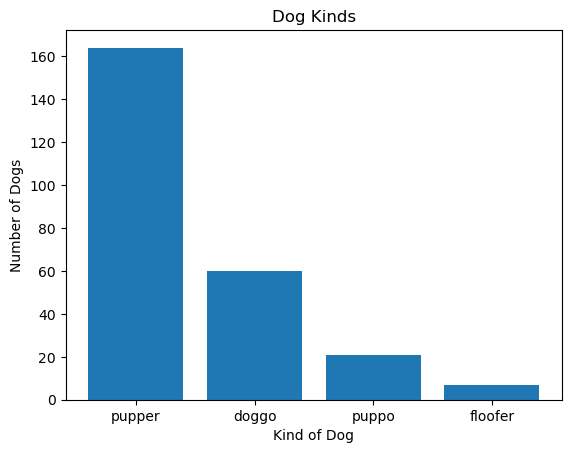

In [142]:
plt.bar(dog_stage_df.index, dog_stage_df.stage)
plt.xlabel('Kind of Dog')
plt.ylabel('Number of Dogs')
plt.title('Dog Kinds')